In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

In [2]:
df = pd.read_csv('dataset_2277.csv')

In [3]:
# hard-coded logic naive model
def predict_win(player_elo, opp_elo):
    if player_elo > opp_elo:
        return 1
    else:
        return 0

In [4]:
def analysis_prediction_stats(df):
    TP = len(df[(df['won_predict'] == 1) & (df['won'] == 1)])
    TN = len(df[(df['won_predict'] == 0) & (df['won'] == 0)])
    FP = len(df[(df['won_predict'] == 1) & (df['won'] == 0)])
    FN = len(df[(df['won_predict'] == 0) & (df['won'] == 1)])

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'N': TP + TN + FP + FN,
        'accuracy': accuracy
    }

In [5]:
stats_list = []

for player_name in df['player_name'].unique():
    player_df = df[df['player_name'] == player_name].copy()
    player_df['won_predict'] = [predict_win(row['player_elo'], row['opp_elo']) for index, row in player_df.iterrows()]

    player_info = {
        'Name': player_name,
        'Current Rating': player_df['player_elo'].iloc[0],
        'Average Rating': round(np.mean(player_df['player_elo']))
    }

    player_info.update(analysis_prediction_stats(player_df))

    stats_list.append(player_info)

stats_df = pd.DataFrame(stats_list)

overall_average_accuracy = np.sum(stats_df['accuracy'] * stats_df['N']) / np.sum(stats_df['N'])
print('overall average accuracy', round(overall_average_accuracy, 5))

stats_df

overall average accuracy 0.52042


,Name,Current Rating,Average Rating,TP,TN,FP,FN,N,accuracy
0,BIG_TONKA_T,1424,1449,31,19,26,24,100,0.500000
1,Andymcg12345,1536,1512,24,24,31,21,100,0.480000
2,alfmi1971,1437,1462,23,27,24,26,100,0.500000
3,majidsafavi,1465,1499,33,26,20,21,100,0.590000
4,riozawazz,1410,1445,25,28,26,21,100,0.530000
5,KINGBONECRUSHER,1410,1452,15,15,10,16,56,0.535714
6,TDVN,1558,1502,22,28,29,21,100,0.500000
7,wizardmelon93,1563,1540,2,5,5,0,12,0.583333
8,KingGreg46,1526,1505,22,27,27,24,100,0.490000
9,Lucienslight,1596,1540,25,23,31,21,100,0.480000


In [6]:
df['won_predict'] = [predict_win(row['player_elo'], row['opp_elo']) for index, row in df.iterrows()]
df['correct'] = df['won'] == df['won_predict']

correct_df = df[df['correct'] == True]
incorrect_df = df[df['correct'] == False]

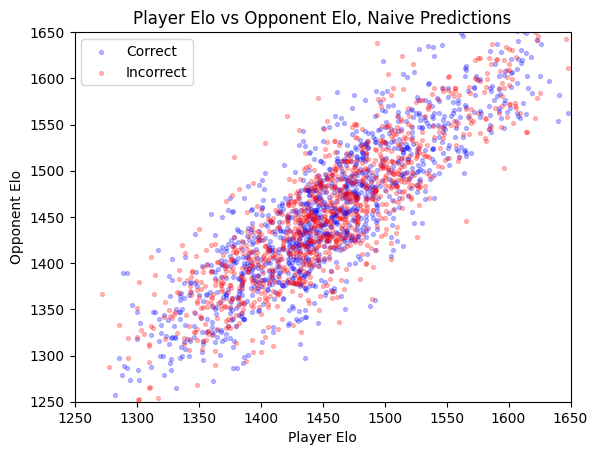

In [7]:
# player vs opponent elo predictions
plt.scatter(correct_df['player_elo'], correct_df['opp_elo'], color='blue', s=8, alpha=0.25, label='Correct')
plt.scatter(incorrect_df['player_elo'], incorrect_df['opp_elo'], color='red', s=8, alpha=0.25, label='Incorrect')

plt.xlabel('Player Elo')
plt.ylabel('Opponent Elo')
plt.title('Player Elo vs Opponent Elo, Naive Predictions')
plt.legend()
plt.ylim(1250, 1650)
plt.xlim(1250, 1650)
plt.show()

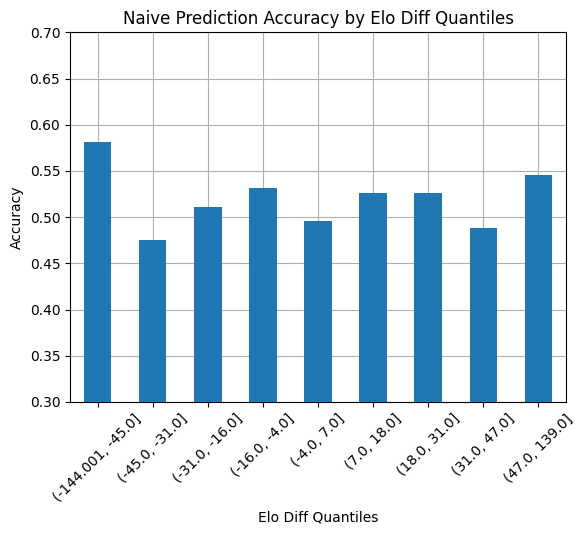

In [8]:
# accuracy by elo difference quantile
num_quantiles = 9
df['quantile'] = pd.qcut(df['elo_diff'], q=num_quantiles)
grouped = df.groupby('quantile', observed=False)['correct'].mean()
grouped.plot(kind='bar', zorder=3)

plt.xlabel('Elo Diff Quantiles')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Naive Prediction Accuracy by Elo Diff Quantiles')
plt.grid(zorder=2)
plt.ylim(0.3, 0.7)

# Show the plot
plt.show()